#### Case Study 6: Build a dense neural network to accurately detect the particle. The goal is to maximize your accuracy. Include a discussion of how you know your model has finished training as well as what design decisions you made while building the network.

##### Team Members:
- Benjamin Goodwin
- Lijju Mathew
- Pradeep Kumar
- Sid Swarupananda

##### Business Understanding
- Problem: Superconductor client's request is to predict the existence of a new particle given a very large, advanced data set.
- Objective: Maximize accuracy on the new particle predictions using Neural Networks.
- Why This Is Important: Detecting new particles can accelerate innovation in the highly competitive semiconductor market. While industry can continue to pack more and more transistors onto semiconductors, this is finite, while finding new particles with differing conductability can fundamentally change the way semiconductors are built and the way they advance technology

In [1]:
#import the useful libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
import math

In [2]:
raw_data= "all_train.csv"
df_full_data = pd.read_csv(raw_data)

In [3]:
df_full_data.describe()

,# label,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f18,f19,f20,f21,f22,f23,f24,f25,f26,mass
count,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,...,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06,7.000000e+06
mean,5.001256e-01,1.612528e-02,4.770022e-04,2.686578e-05,1.056081e-02,-1.050026e-04,2.765919e-03,1.815953e-02,2.510948e-05,4.345870e-04,...,1.164789e-02,-1.127097e-04,7.686731e-05,2.909202e-04,1.228774e-02,9.778378e-03,5.269844e-03,-1.760961e-03,1.533136e-02,1.000107e+03
std,5.000000e-01,1.004417e+00,9.974864e-01,1.000080e+00,9.956003e-01,9.998670e-01,1.000957e+00,9.867746e-01,9.965867e-01,1.000007e+00,...,1.002725e+00,1.000038e+00,1.000033e+00,1.000170e+00,1.010477e+00,1.005418e+00,1.009990e+00,9.844511e-01,9.822799e-01,3.534255e+02
min,0.000000e+00,-1.960549e+00,-2.365355e+00,-1.732165e+00,-9.980274e+00,-1.732137e+00,-1.054221e+00,-3.034787e+00,-2.757853e+00,-1.732359e+00,...,-1.728284e+00,-2.281867e+00,-1.731758e+00,-5.736825e-01,-3.631608e+00,-4.729473e+00,-2.062223e+01,-3.452634e+00,-2.632761e+00,5.000000e+02
25%,0.000000e+00,-7.288206e-01,-7.332548e-01,-8.656704e-01,-6.092291e-01,-8.658025e-01,-1.054221e+00,-7.566092e-01,-7.014146e-01,-8.656543e-01,...,-7.423630e-01,-7.206846e-01,-8.656855e-01,-5.736825e-01,-5.417942e-01,-5.115522e-01,-3.543870e-01,-6.925097e-01,-7.943804e-01,7.500000e+02
50%,1.000000e+00,-3.930319e-02,8.523957e-04,3.199154e-04,1.963316e-02,-5.070131e-04,-5.983562e-03,-1.499527e-01,-1.067553e-04,1.384781e-03,...,-8.992496e-02,-6.735953e-05,-4.424527e-04,-5.736825e-01,-1.602760e-01,-3.144032e-01,-3.265228e-01,-3.570301e-01,-8.828640e-02,1.000000e+03
75%,1.000000e+00,6.900799e-01,7.347832e-01,8.659464e-01,6.798818e-01,8.657646e-01,8.504885e-01,7.686690e-01,7.013194e-01,8.665976e-01,...,6.423185e-01,7.204921e-01,8.659566e-01,-5.736825e-01,4.812194e-01,1.634892e-01,-2.337671e-01,4.753128e-01,7.610846e-01,1.250000e+03
max,1.000000e+00,4.378282e+00,2.365287e+00,1.732370e+00,4.148023e+00,1.731978e+00,4.482618e+00,3.720345e+00,2.758590e+00,1.731450e+00,...,5.866367e+00,2.282217e+00,1.732740e+00,1.743123e+00,7.293420e+00,9.333287e+00,1.499064e+01,5.277313e+00,4.444690e+00,1.500000e+03



There are 3500879.0 classified as 1, and 3499121.0 classified 0 making this an almost perfectly balanced target.


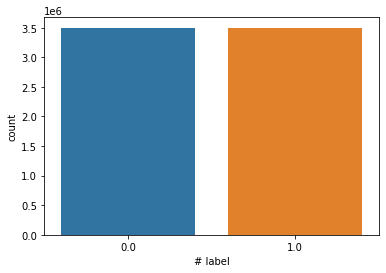

In [4]:
sns.countplot(x=df_full_data["# label"])
on = df_full_data["# label"].sum()
off = len(df_full_data["# label"]) - on

print(f"\nThere are {on} classified as 1, and {off} classified 0 making this an almost perfectly balanced target.")

In [5]:
n = sum(1 for line in open(raw_data))- 1
s = n//70
print("The total number of records :", n)
print("The number of sub sample records :", s)
skip = sorted(random.sample(range(1, n+1), n-s))  # n+1 to compensate for header 
df_sub_sample_data = pd.read_csv(raw_data, skiprows=skip)

The total number of records : 7000000
The number of sub sample records : 100000


In [6]:
df_sub_sample_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   # label  100000 non-null  float64
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   f3       100000 non-null  float64
 5   f4       100000 non-null  float64
 6   f5       100000 non-null  float64
 7   f6       100000 non-null  float64
 8   f7       100000 non-null  float64
 9   f8       100000 non-null  float64
 10  f9       100000 non-null  float64
 11  f10      100000 non-null  float64
 12  f11      100000 non-null  float64
 13  f12      100000 non-null  float64
 14  f13      100000 non-null  float64
 15  f14      100000 non-null  float64
 16  f15      100000 non-null  float64
 17  f16      100000 non-null  float64
 18  f17      100000 non-null  float64
 19  f18      100000 non-null  float64
 20  f19      100000 non-null  f


There are 49973.0 classified as 1, and 50027.0 classified 0 making this an almost perfectly balanced target. This is representative of a sample of 100k records, however in our investigation into the entirity of the data set,  the full set of data showed an even closer balance of almost exactly 50/50 split.


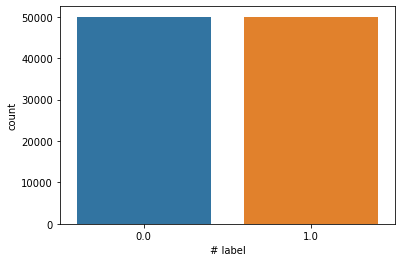

In [7]:
sns.countplot(x=df_sub_sample_data["# label"])
on = df_sub_sample_data["# label"].sum()
off = len(df_sub_sample_data["# label"]) - on

print(
    f"\nThere are {on} classified as 1, and {off} classified 0 making this an almost perfectly balanced target.",
    "This is representative of a sample of 100k records, however in our investigation into the entirity of the data set,",
    " the full set of data showed an even closer balance of almost exactly 50/50 split."
)

In [8]:
df_sub_sample_data.isnull().sum()

# label    0
f0         0
f1         0
f2         0
f3         0
f4         0
f5         0
f6         0
f7         0
f8         0
f9         0
f10        0
f11        0
f12        0
f13        0
f14        0
f15        0
f16        0
f17        0
f18        0
f19        0
f20        0
f21        0
f22        0
f23        0
f24        0
f25        0
f26        0
mass       0
dtype: int64

In [9]:
df_sub_sample_data.duplicated().sum()

0

There were few modifications needed in order to bring the data up to the point where it could be easily modeled.

The data had no missing values, nor duplicate rows or columns. The target in the source data was well balanced, at almost a perfect 50/50 split.

The dataset has 7 billion records and it contains a target variable, # label and 28 predictors which are labeled f0 through f26 and are without much context or description as to their value, meaning, or their relationship to one another. Finally, a mass predictor column is provided that is several orders of magnitude larger than all other variables and will need to be normalized as we proceed.

Within the data target, class 1 is indicative of the detection of the new particle, while class 0 indicates that there was no detection of the new particle.

The dataset is sub sampled to 100,000 records and the dataset is balanced as wel

In [10]:
df_sub_sample_data['label'] = df_sub_sample_data['# label'].astype(int).astype('category')
df_sub_sample_data = df_sub_sample_data.drop('# label', 1)

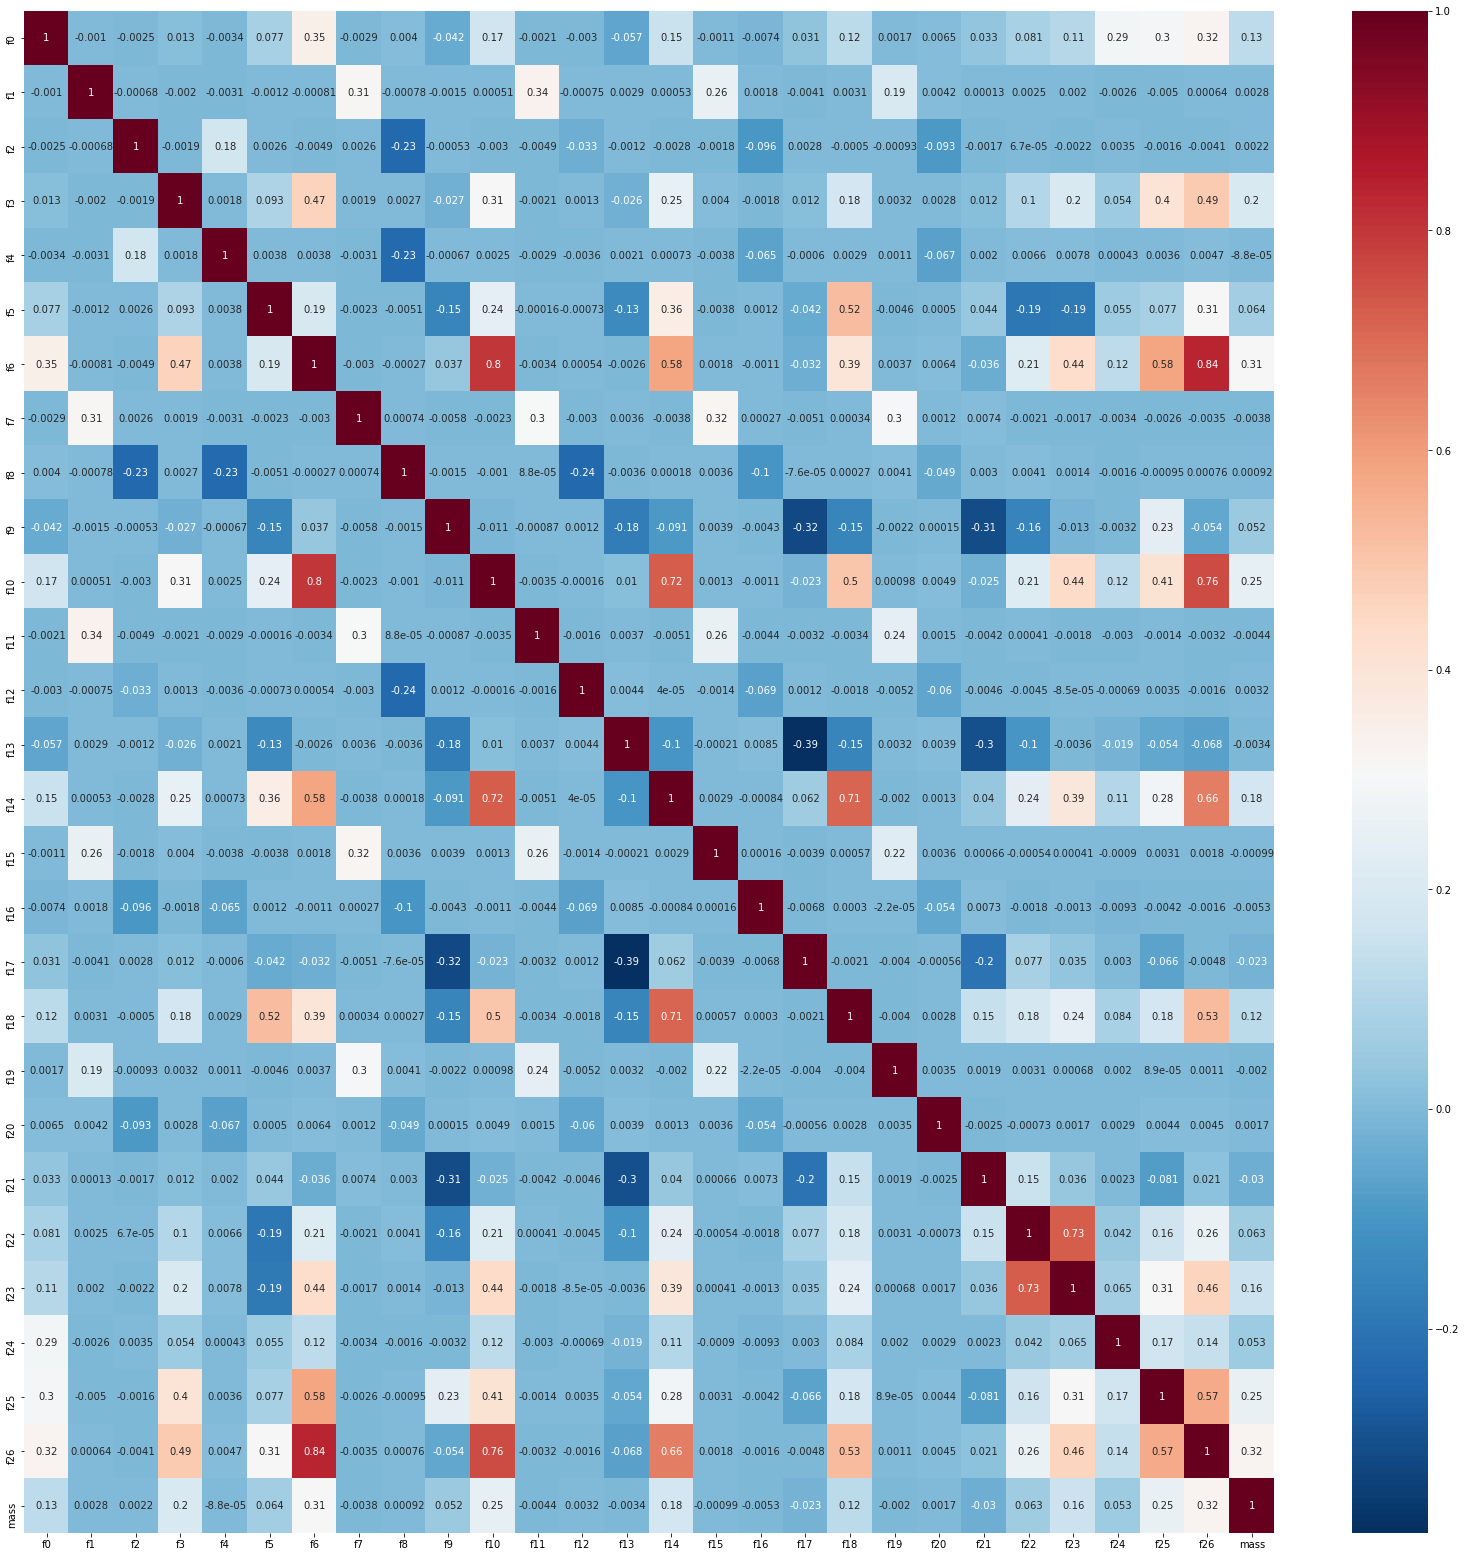

In [11]:
corrMatrix = df_sub_sample_data.corr()
plt.figure(figsize=(28,28))
#corrMatrix = corrMatrix[corrMatrix>= 0.75]
# corrMatrix = corrMatrix[corrMatrix<=<= -0.75]
sns.heatmap(corrMatrix, cmap='RdBu_r', annot=True)
plt.show()

In [12]:
print(f"Correlation between f10 and f6: {df_sub_sample_data['f10'].corr(df_sub_sample_data['f6']):.2f}")
print(f"Correlation between f10 and f26: {df_sub_sample_data['f10'].corr(df_sub_sample_data['f26']):.2f}")
print(f"Correlation between f26 and f6: {df_sub_sample_data['f26'].corr(df_sub_sample_data['f6']):.2f}")

Correlation between f10 and f6: 0.80
Correlation between f10 and f26: 0.76
Correlation between f26 and f6: 0.84


Most of the columns show little to no correlation, however we see high degrees of correlation between f6 & f10, f6 & f26, and f10 & f26.

##### Identifying Outliers:

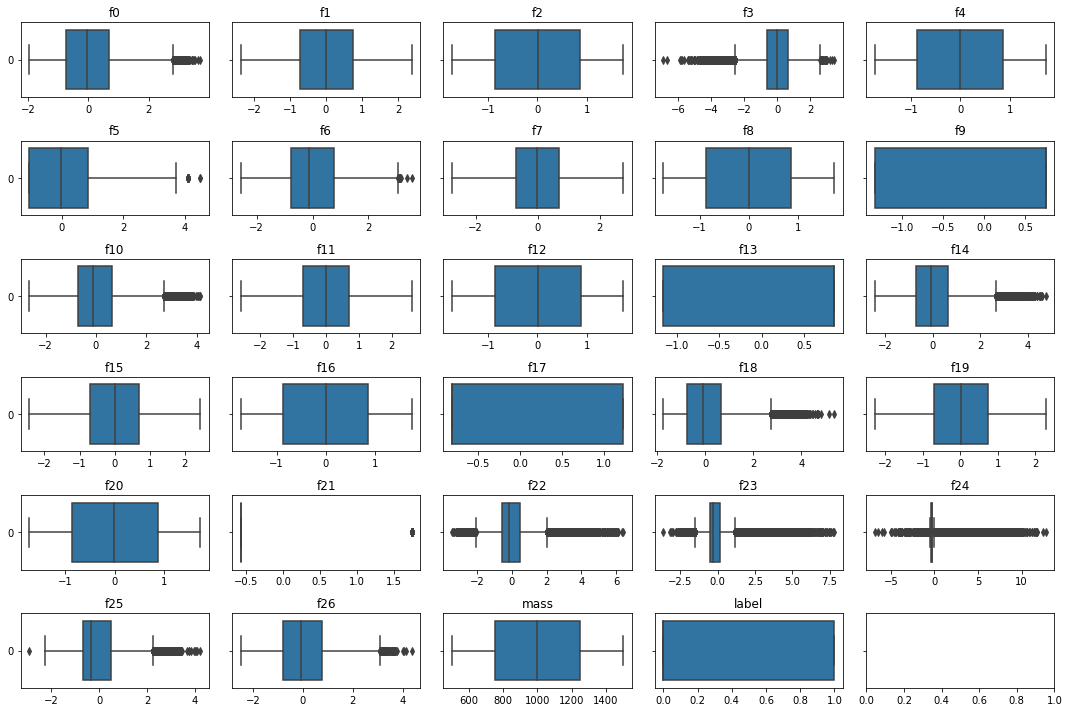

In [13]:
def draw_boxplots(df_sub_sample_data, n_cols=5):
    n_rows = math.ceil(len(df_sub_sample_data.columns) / n_cols)
    fig, ax = plt.subplots(ncols=n_cols, nrows=n_rows, sharey=True,figsize=(15,10))
    for i, var_name in enumerate(df_sub_sample_data.columns):
        sns.boxplot(data=df_sub_sample_data[var_name], ax=ax[i//n_cols][i - (n_cols * (i//n_cols))], orient="h").set_title(var_name)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()
    
draw_boxplots(df_sub_sample_data=df_sub_sample_data.loc[:, df_sub_sample_data.columns != "# label"])

In [14]:
##### Checking the Normalcy of Predictors

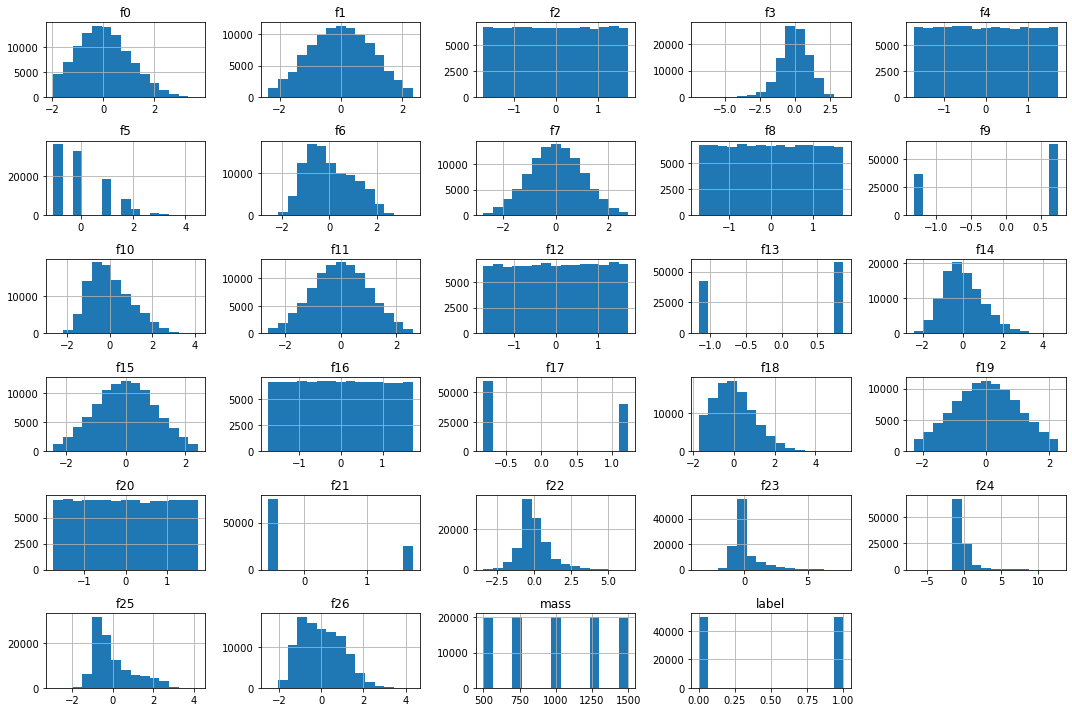

In [15]:
def draw_histograms(df_sub_sample_data, n_cols=5):
    n_rows = math.ceil(len(df_sub_sample_data.columns) / n_cols)
    fig = plt.figure(figsize=(15, 10))
    for i, var_name in enumerate(df_sub_sample_data.columns):
        ax = fig.add_subplot(n_rows, n_cols, i + 1)
        df_sub_sample_data[var_name].hist(bins=15, ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()


draw_histograms(df_sub_sample_data=df_sub_sample_data.loc[:, df_sub_sample_data.columns != "# label"])

Checking the distribution of all the predictors, we saw that there was some moderate right skew in f0, f5, f10, f14, f18, f22, f23, f24, f25, and f26 and slight left skew in f3.

Because the skew is moderate, simple transformations of the predictors would result in skew in the opposite direction. We decided to Proceed without transforming any of the predictor variables

##### Model Preperations

From our EDA, we found that there are 7 million records in the dataset. Given the huge volume of the data, we decided that modeling the entire data would result not only poor computing performance but also would make it difficult to troubleshoot and analyze. We decided to use subset of data (100,000 rows)

Due to the request on building out a binary classifier to maximize accuracy on the new particle predictions, we decided to build out neural network with 1 layer, 2 layer and additonal drop in layer

As requested, Accuracy will be used as the main evaluation metric for our overall modeling. A Loss Function and more specifically, the Loss per neural network process will the secondary metric of approximating the usefulness of our model at different steps (chunk number) of the model. 

In [16]:
X = df_sub_sample_data.loc[:, df_sub_sample_data.columns != 'label'].values
y = df_sub_sample_data['label'].astype('category').cat.codes


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

##### Model Preparations Summary
- The dataset is split into 70:30.
- The target variable is already converted as categorical variable.
- The data is scaled with standard scaler.
- Since we have a balanced dataset, accuracy would be a good metric for model evaluation.

In [17]:
model1 = Sequential()
#First Hidden Layer
model1.add(Dense(4, activation='relu', kernel_initializer='random_normal',input_dim=28))
#Output Layer
model1.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
#Compiling the neural network
model1.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [18]:
#Fitting the data to the training dataset
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=10, restore_best_weights=True)
history1 = model1.fit(X_train,y_train,callbacks=[es],epochs=80, batch_size=10, validation_split=0.2, shuffle=True, verbose=1)

Epoch 1/80
5600/5600 [==============================] - 8s 1ms/step - loss: 0.3642 - accuracy: 0.8267 - val_loss: 0.3365 - val_accuracy: 0.8409
Epoch 2/80
5600/5600 [==============================] - 7s 1ms/step - loss: 0.3275 - accuracy: 0.8425 - val_loss: 0.3317 - val_accuracy: 0.8374
Epoch 3/80
5600/5600 [==============================] - 7s 1ms/step - loss: 0.3242 - accuracy: 0.8414 - val_loss: 0.3292 - val_accuracy: 0.8401
Epoch 4/80
5600/5600 [==============================] - 7s 1ms/step - loss: 0.3221 - accuracy: 0.8409 - val_loss: 0.3276 - val_accuracy: 0.8384
Epoch 5/80
5600/5600 [==============================] - 7s 1ms/step - loss: 0.3205 - accuracy: 0.8414 - val_loss: 0.3259 - val_accuracy: 0.8378
Epoch 6/80
5600/5600 [==============================] - 8s 1ms/step - loss: 0.3193 - accuracy: 0.8425 - val_loss: 0.3250 - val_accuracy: 0.8394
Epoch 7/80
5600/5600 [==============================] - 8s 1ms/step - loss: 0.3177 - accuracy: 0.8431 - val_loss: 0.3251 - val_accuracy:

In [19]:
#Fitting the data to the training dataset
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=10, restore_best_weights=True)
history1 = model1.fit(X_train,y_train,callbacks=[es],epochs=80, batch_size=10, validation_split=0.2, shuffle=True, verbose=1)

Epoch 1/80
5600/5600 [==============================] - 8s 1ms/step - loss: 0.3090 - accuracy: 0.8555 - val_loss: 0.3154 - val_accuracy: 0.8526
Epoch 2/80
5600/5600 [==============================] - 8s 1ms/step - loss: 0.3086 - accuracy: 0.8564 - val_loss: 0.3141 - val_accuracy: 0.8521
Epoch 3/80
5600/5600 [==============================] - 7s 1ms/step - loss: 0.3084 - accuracy: 0.8565 - val_loss: 0.3148 - val_accuracy: 0.8531
Epoch 4/80
5600/5600 [==============================] - 7s 1ms/step - loss: 0.3085 - accuracy: 0.8557 - val_loss: 0.3140 - val_accuracy: 0.8527
Epoch 5/80
5600/5600 [==============================] - 7s 1ms/step - loss: 0.3084 - accuracy: 0.8558 - val_loss: 0.3146 - val_accuracy: 0.8529
Epoch 6/80
5600/5600 [==============================] - 7s 1ms/step - loss: 0.3084 - accuracy: 0.8562 - val_loss: 0.3137 - val_accuracy: 0.8529
Epoch 7/80
5600/5600 [==============================] - 7s 1ms/step - loss: 0.3084 - accuracy: 0.8557 - val_loss: 0.3143 - val_accuracy:

In [20]:
def get_learning_curve_loss(history):
    history_dict = history.history
    # Learning curve(Loss)
    # let's see the training and validation loss by epoch

    # loss
    loss_values = history_dict['loss'] # you can change this
    val_loss_values = history_dict['val_loss'] # you can also change this

    # range of X (no. of epochs)
    epochs = range(1, len(loss_values) + 1) 

    # plot
    plt.plot(epochs, loss_values, 'bo', label='Training loss')
    plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [21]:
def get_learning_curve_accuracy(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    # range of X (no. of epochs)
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    # orange is for "orange"
    plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    print('The highest accuracy is :',np.max(val_acc))

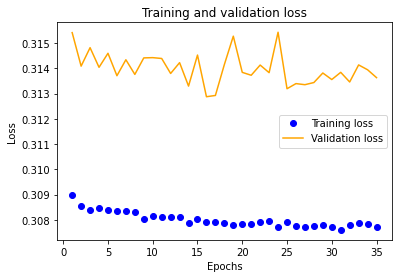

In [22]:
get_learning_curve_loss(history1)

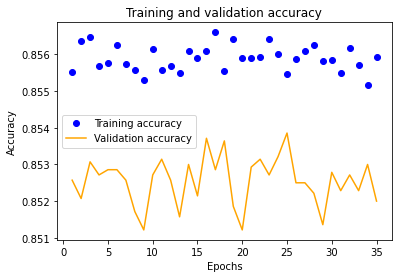

The highest accuracy is : 0.853857159614563


In [23]:
get_learning_curve_accuracy(history1)

In [24]:
y_train_pred1 = np.round(model1.predict(X_train),0)
print("\n Classification Report \n",classification_report(y_train, y_train_pred1, digits=6))


 Classification Report 
               precision    recall  f1-score   support

           0   0.873457  0.833062  0.852782     35073
           1   0.839804  0.878804  0.858862     34927

    accuracy                       0.855886     70000
   macro avg   0.856630  0.855933  0.855822     70000
weighted avg   0.856665  0.855886  0.855815     70000



In [25]:
y_test_pred1 = np.round(model1.predict(X_test),0)
print("\n Classification Report \n",classification_report(y_test, y_test_pred1, digits=6))


 Classification Report 
               precision    recall  f1-score   support

           0   0.872298  0.828608  0.849892     14954
           1   0.837733  0.879436  0.858079     15046

    accuracy                       0.854100     30000
   macro avg   0.855016  0.854022  0.853985     30000
weighted avg   0.854963  0.854100  0.853998     30000



##### Model 2 - Added more layers

In [26]:
model2 = Sequential()
#First Hidden Layer
model2.add(Dense(4, activation='relu', kernel_initializer='random_normal',input_dim=28))
#Second Hidden Layer
model2.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
#Output Layer
model2.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
#Compiling the neural network
model2.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [27]:
history2 = model2.fit(X_train,y_train,callbacks=[es],epochs=80, batch_size=10, validation_split=0.2, shuffle=True, verbose=1)

Epoch 1/80
5600/5600 [==============================] - 7s 1ms/step - loss: 0.3540 - accuracy: 0.8342 - val_loss: 0.3334 - val_accuracy: 0.8419
Epoch 2/80
5600/5600 [==============================] - 7s 1ms/step - loss: 0.3244 - accuracy: 0.8451 - val_loss: 0.3277 - val_accuracy: 0.8442
Epoch 3/80
5600/5600 [==============================] - 7s 1ms/step - loss: 0.3180 - accuracy: 0.8489 - val_loss: 0.3206 - val_accuracy: 0.8482
Epoch 4/80
5600/5600 [==============================] - 7s 1ms/step - loss: 0.3111 - accuracy: 0.8529 - val_loss: 0.3139 - val_accuracy: 0.8529
Epoch 5/80
5600/5600 [==============================] - 7s 1ms/step - loss: 0.3072 - accuracy: 0.8548 - val_loss: 0.3126 - val_accuracy: 0.8522
Epoch 6/80
5600/5600 [==============================] - 7s 1ms/step - loss: 0.3063 - accuracy: 0.8554 - val_loss: 0.3113 - val_accuracy: 0.8513
Epoch 7/80
5600/5600 [==============================] - 7s 1ms/step - loss: 0.3057 - accuracy: 0.8552 - val_loss: 0.3121 - val_accuracy:

In [28]:
y_train_pred2 = np.round(model2.predict(X_train),0)
print("\n Classification Report \n",classification_report(y_train, y_train_pred2, digits=6))


 Classification Report 
               precision    recall  f1-score   support

           0   0.888546  0.811935  0.848515     35073
           1   0.826197  0.897730  0.860479     34927

    accuracy                       0.854743     70000
   macro avg   0.857371  0.854832  0.854497     70000
weighted avg   0.857436  0.854743  0.854484     70000



In [29]:
y_test_pred2 = np.round(model1.predict(X_test),0)
print("\n Classification Report \n",classification_report(y_test, y_test_pred2, digits=6))


 Classification Report 
               precision    recall  f1-score   support

           0   0.872298  0.828608  0.849892     14954
           1   0.837733  0.879436  0.858079     15046

    accuracy                       0.854100     30000
   macro avg   0.855016  0.854022  0.853985     30000
weighted avg   0.854963  0.854100  0.853998     30000



##### Model 3 - Added drop out layers.

In [30]:
model3 = Sequential()
#First Hidden Layer
model3.add(Dense(4, activation='relu', kernel_initializer='random_normal',input_dim=28))
model3.add(Dropout(rate = 0.1))
#Second Hidden Layer
model3.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
model3.add(Dropout(rate = 0.1))
#Output Layer
model3.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
#Compiling the neural network
model3.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [31]:
history3 = model3.fit(X_train,y_train,callbacks=[es],epochs=80, batch_size=10, validation_split=0.2, shuffle=True, verbose=1)

Epoch 1/80
5600/5600 [==============================] - 8s 1ms/step - loss: 0.3909 - accuracy: 0.8232 - val_loss: 0.3381 - val_accuracy: 0.8412
Epoch 2/80
5600/5600 [==============================] - 7s 1ms/step - loss: 0.3589 - accuracy: 0.8308 - val_loss: 0.3344 - val_accuracy: 0.8378
Epoch 3/80
5600/5600 [==============================] - 7s 1ms/step - loss: 0.3550 - accuracy: 0.8300 - val_loss: 0.3309 - val_accuracy: 0.8396
Epoch 4/80
5600/5600 [==============================] - 7s 1ms/step - loss: 0.3500 - accuracy: 0.8301 - val_loss: 0.3269 - val_accuracy: 0.8429
Epoch 5/80
5600/5600 [==============================] - 7s 1ms/step - loss: 0.3492 - accuracy: 0.8319 - val_loss: 0.3252 - val_accuracy: 0.8439
Epoch 6/80
5600/5600 [==============================] - 7s 1ms/step - loss: 0.3459 - accuracy: 0.8343 - val_loss: 0.3208 - val_accuracy: 0.8461
Epoch 7/80
5600/5600 [==============================] - 7s 1ms/step - loss: 0.3447 - accuracy: 0.8345 - val_loss: 0.3198 - val_accuracy:

In [32]:
y_train_pred3 = np.round(model3.predict(X_train),0)
print("\n Classification Report \n",classification_report(y_train, y_train_pred3, digits=6))


 Classification Report 
               precision    recall  f1-score   support

           0   0.900733  0.798392  0.846481     35073
           1   0.818282  0.911644  0.862444     34927

    accuracy                       0.854900     70000
   macro avg   0.859508  0.855018  0.854462     70000
weighted avg   0.859594  0.854900  0.854446     70000



In [33]:
y_test_pred3 = np.round(model1.predict(X_test),0)
print("\n Classification Report \n",classification_report(y_test, y_test_pred3, digits=6))


 Classification Report 
               precision    recall  f1-score   support

           0   0.872298  0.828608  0.849892     14954
           1   0.837733  0.879436  0.858079     15046

    accuracy                       0.854100     30000
   macro avg   0.855016  0.854022  0.853985     30000
weighted avg   0.854963  0.854100  0.853998     30000



#### Model Summary
- We started of with a basic model with 1 hidden layer. Early stopping is implemented and the loss function used is binary entropy since it is a binary classification.
- The first model had 85% accuracy and good recall as well.
- For the second model, an another layer was added. The accuracy and other metrics were pretty much the same as first model.
- For the third model, a drop out layer was added to reduce any over fitting and the accuracy and other metrics were same as other models.

Below are the model metrics


| Model | Train/Test | Target | Accuracy | Precision | Recall | F-Score |
| :- | -: |:- |:- |:- |:- | :-: |
| NN Model(1 Hidden Layer) |Train | 0 | 0.85 | 0.88 | 0.81 | 0.85 |
| | | 1 | | 0.83 | 0.89|0.86|
| | Test | 0 | 0.85 | 0.88 | 0.81 | 0.84 |
| | | 1 | | 0.82 | 0.89|0.85|
| NN Model(2 Hidden Layer) |Train | 0 | 0.85 | 0.88 | 0.82 | 0.85 |
| | | 1 | | 0.83 | 0.89|0.86|
| | Test | 0 | 0.85 | 0.85 | 0.81 | 0.84 |
| | | 1 | | 0.82 | 0.89|0.85|
| NN Model(2 Hidden Layer with drop out Layers) |Train | 0 | 0.85 | 0.88 | 0.81 | 0.84 |
| | | 1 | | 0.82 | 0.89|0.86|
| | Test | 0 | 0.85 | 0.88 | 0.81 | 0.84 |
| | | 1 | | 0.82 | 0.89|0.85|


